In [6]:
from scheduler.gate_scheduler import gate_scheduling
from Construct_Circuit import *
from mvqc import *
from enola import *
import qiskit.qasm2
import random
import math

I_List = range(10)

n = 20
Row = math.ceil(math.sqrt(n))
circ = QuantumCircuit.from_qasm_file(f"vqe/vqe_n{n}.qasm")

test_circuit = transpile(circ, basis_gates=["u1", "u2", "u3", "cz", "id"],  optimization_level=2)

cz_blocks = get_cz_blocks(test_circuit)

mvqc_transfer_duration, mvqc_move_duration, mvqc_cir_fidelity, mvqc_cir_fidelity_1q_gate, mvqc_cir_fidelity_2q_gate, mvqc_cir_fidelity_2q_gate_for_idle, mvqc_cir_fidelity_atom_transfer, mvqc_cir_fidelity_coherence, mvqc_nstage = mvqc(cz_blocks, Row, n, True)

2 stages
[INFO] Enola: Start SA-based placement
[INFO] Enola: Use l2 model for WL
[INFO] Enola: SA-Based Placer: Iter 0, cost: 18.100000
[(3, 0), (3, 1), (2, 1), (2, 0), (1, 0), (0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (3, 2), (4, 2), (4, 3), (3, 3), (2, 3), (2, 4), (1, 4), (0, 4), (0, 3), (1, 3)]
qubit mapping [(3, 0), (3, 1), (2, 1), (2, 0), (1, 0), (0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (3, 2), (4, 2), (4, 3), (3, 3), (2, 3), (2, 4), (1, 4), (0, 4), (0, 3), (1, 3)]
{(0, -42): [], (0, -41): [], (0, -40): [], (0, -39): [], (0, -38): [], (0, -37): [], (0, -36): [], (0, -35): [], (0, -34): [], (0, -33): [], (0, -32): [], (0, -31): [], (0, -30): [], (0, -29): [], (0, -28): [], (0, -27): [], (0, -26): [], (0, -25): [], (0, -24): [], (0, -23): [], (0, -22): [], (0, -21): [], (0, -20): [], (0, -19): [], (0, -18): [], (0, -17): [], (0, -16): [], (0, -15): [], (0, -14): [], (0, -13): [], (0, -12): [], (0, -11): [], (0, -10): [], (0, -9): [], (0, -8): [], (0, -7): [], (0, -6): [5], (0, -5): [6

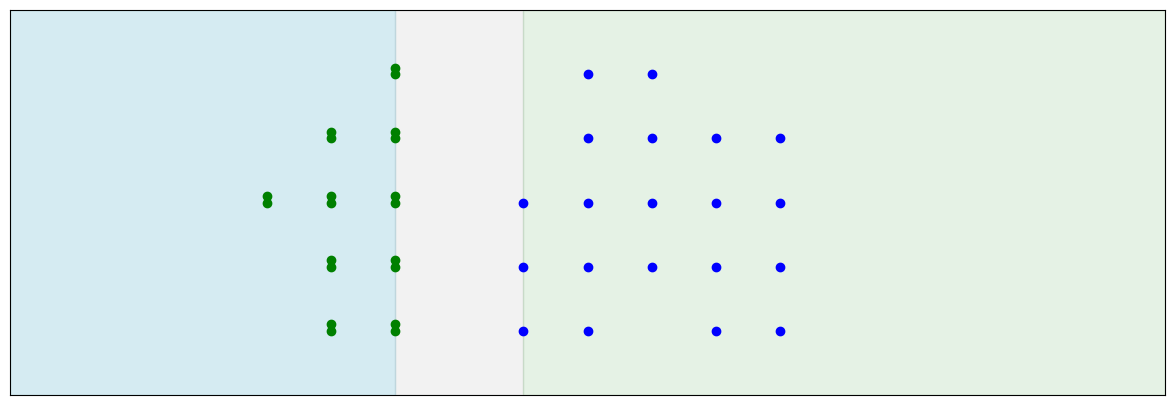

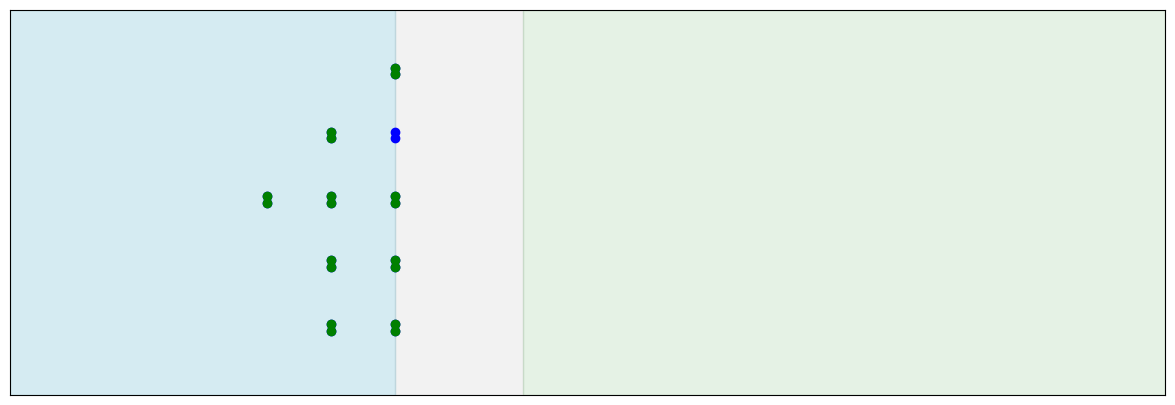

In [12]:

import matplotlib.pyplot as plt
pos_0 = {0: (3, -6), 1: (3, -5), 2: (2, -5), 3: (2, -6), 4: (1, -6), 5: (0, -6), 6: (0, -5), 7: (1, -5), 8: (1, -4), 9: (2, -4), 10: (3, -4), 11: (4, -4), 12: (4, -3), 13: (3, -3), 14: (2, -3), 15: (2, -2), 16: (1, -2), 17: (0, -2), 18: (0, -3), 19: (1, -3)}
pos_1 = {0: (3, 0), 1: (3, 0), 2: (2, 0), 3: (2, 0), 4: (0, 0), 5: (0, 0), 6: (1, 0), 7: (1, 0), 8: (2, 1), 9: (2, 1), 10: (4, 0), 11: (4, 0), 12: (3, 1), 13: (3, 1), 14: (2, 2), 15: (2, 2), 16: (0, 1), 17: (0, 1), 18: (1, 1), 19: (1, 1)}
pos_2 = {0: (3, -42), 1: (2, 0), 2: (2, 0), 3: (0, 0), 4: (0, 0), 5: (1, 0), 6: (1, 0), 7: (2, 1), 8: (2, 1), 9: (4, 0), 10: (4, 0), 11: (3, 1), 12: (3, 1), 13: (2, 2), 14: (2, 2), 15: (0, 1), 16: (0, 1), 17: (1, 1), 18: (1, 1), 19: (1, -42)}


plt.figure(figsize=(Row * 3 + 2, Row))
for q in pos_0.keys():
    plt.plot(Row - pos_0[q][1], pos_0[q][0], 'o', color='blue', label=q) 

pos_taken = []
for q in pos_1.keys():
    if (Row - pos_1[q][1], pos_1[q][0]) not in pos_taken:
        plt.plot(Row - pos_1[q][1], pos_1[q][0], 'o', color='green', label=q)
        pos_taken.append((Row - pos_1[q][1], pos_1[q][0]))
    else:
        plt.plot(Row - pos_1[q][1], pos_1[q][0] + 0.1, 'o', color='green', label=q)
# 创建网格
plt.grid(True)  # 启用网格

# 设置 x 和 y 轴的范围
plt.xlim(-1, Row * 3 + 2)
plt.ylim(-1, Row)

# 设置刻度
plt.xticks([])  # x 轴刻度
plt.yticks([])  # y 轴刻度
plt.grid(True)
# 绘制网格线
# plt.axhline(0, color='black', linewidth=0.5)  # 水平线
# plt.axvline(0, color='black', linewidth=0.5)  # 垂直线
plt.gca().set_aspect('equal', adjustable='box')
# 添加标题
# plt.title('Simple Grid Plot')
plt.fill_betweenx(y=[-1, Row], x1=-1, x2=Row, color='lightblue', alpha=0.5)
plt.fill_betweenx(y=[-1, Row], x1=Row, x2=Row + 2, color='grey', alpha=0.1)
plt.fill_betweenx(y=[-1, Row], x1=Row + 2, x2=Row * 3 + 2, color='green', alpha=0.1)
# 显示图形


plt.show()

plt.figure(figsize=(Row * 3 + 2, Row))
pos_taken = []
for q in pos_1.keys():
    if (Row - pos_1[q][1], pos_1[q][0]) not in pos_taken:
        plt.plot(Row - pos_1[q][1], pos_1[q][0], 'o', color='blue', label=q)
        pos_taken.append((Row - pos_1[q][1], pos_1[q][0]))
    else:
        plt.plot(Row - pos_1[q][1], pos_1[q][0] + 0.1, 'o', color='blue', label=q)

pos_taken = []
for q in pos_2.keys():
    if (Row - pos_2[q][1], pos_2[q][0]) not in pos_taken:
        plt.plot(Row - pos_2[q][1], pos_2[q][0], 'o', color='green', label=q)
        pos_taken.append((Row - pos_2[q][1], pos_2[q][0]))
    else:
        plt.plot(Row - pos_2[q][1], pos_2[q][0] + 0.1, 'o', color='green', label=q)
# 创建网格
plt.grid(True)  # 启用网格

# 设置 x 和 y 轴的范围
plt.xlim(-1, Row * 3 + 2)
plt.ylim(-1, Row)

# 设置刻度
plt.xticks([])  # x 轴刻度
plt.yticks([])  # y 轴刻度
plt.grid(True)
# 绘制网格线
# plt.axhline(0, color='black', linewidth=0.5)  # 水平线
# plt.axvline(0, color='black', linewidth=0.5)  # 垂直线
plt.gca().set_aspect('equal', adjustable='box')
# 添加标题
# plt.title('Simple Grid Plot')
plt.fill_betweenx(y=[-1, Row], x1=-1, x2=Row, color='lightblue', alpha=0.5)
plt.fill_betweenx(y=[-1, Row], x1=Row, x2=Row + 2, color='grey', alpha=0.1)
plt.fill_betweenx(y=[-1, Row], x1=Row + 2, x2=Row * 3 + 2, color='green', alpha=0.1)
# 显示图形


plt.show()